In [80]:
setwd("~/Documents/DE/Shed/")
require(ggplot2)
require(nlme)
require(tidyr)
require(MASS)
require(dplyr)
require(EnvStats)
require(lme4)

Other things to look at: 
Can we compare oysters that died to oysters that survived. 
when an oyster died, you know how many cells they released in the last 6 hours. 

In [81]:
cells=read.csv("Cells_found_actualhigh.csv")
oysters=read.csv("Oyster_data.csv")

In [82]:
head(oysters)

ID,Salinity,TISSUE,MORTALITY.DATE,Gape,Mortality,Gape_day,Mortality_day,Four_trials,Survived
26Y,HIGH,4,,NA,NA,NA,NA,Yes,Yes
27Y,HIGH,NA,20-Oct,NA,21-Oct,NA,11,No,No
28Y,HIGH,2,,NA,NA,NA,NA,No,Yes
29Y,HIGH,NA,11-Nov,NA,12-Nov,NA,NA,No,No
30Y,HIGH,3,,NA,NA,NA,NA,Yes,Yes
32Y,HIGH,5,,NA,NA,NA,NA,Yes,Yes


In [83]:
mean(oysters$Mortality_day, na.rm=TRUE)

[1] 17

In [84]:
mean(oysters$Mortality_day)

[1] NA

In [85]:
#reformat dataframe, separate day and treatment
cells=pivot_longer(cells, Ambient_5:Heat_32, names_to=c("Treatment","Day"), names_sep="_", values_to="number")

In [86]:
head(cells)

ID,Treatment,Day,number
26Y,Ambient,5,NA
26Y,Ambient,7,NA
26Y,Ambient,10,4
26Y,Ambient,14,5
26Y,Heat,21,NA
26Y,Heat,23,NA


In [87]:
#combine 0.5 and 1 and 4 and 5 
oysters$Tissue_sim=ifelse(oysters$TISSUE==0.5, 1.0, ifelse(oysters$TISSUE==5, 4.0, oysters$TISSUE))

In [88]:
all=merge(cells,oysters, by="ID")

In [89]:
all$Trial=ifelse(all$Day=="5"|all$Day=="10"|all$Day== "21"| all$Day=="28", "one", "two")

## Influence of salinity on mackin score of tissue (for all oysters with mackin score) 

In [90]:
#combine 0.5 and 1 and 4 and 5 
all$Tissue_sim=ifelse(all$TISSUE==0.5, 1.0, ifelse(all$TISSUE==5, 4.0, all$TISSUE))
all$Tissue_sim2=ifelse(all$TISSUE==0.5, 1.0, all$TISSUE)

In [91]:
(all$TISSUE)

[1] 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0
 [19] 1.0 1.0 1.0 1.0 1.0 1.0 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 2.0 2.0 2.0 2.0
 [37] 2.0 2.0 2.0 2.0 4.0 4.0 4.0 4.0 4.0 4.0 4.0 4.0 4.0 4.0 4.0 4.0 4.0 4.0
 [55] 4.0 4.0 4.0 4.0 4.0 4.0 4.0 4.0 4.0 4.0  NA  NA  NA  NA  NA  NA  NA  NA
 [73] 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 2.0 2.0
 [91] 2.0 2.0 2.0 2.0 2.0 2.0  NA  NA  NA  NA  NA  NA  NA  NA 4.0 4.0 4.0 4.0
[109] 4.0 4.0 4.0 4.0 4.0 4.0 4.0 4.0 4.0 4.0 4.0 4.0 4.0 4.0 4.0 4.0 4.0 4.0
[127] 4.0 4.0  NA  NA  NA  NA  NA  NA  NA  NA 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0
[145] 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 5.0 5.0 5.0 5.0 5.0 5.0 5.0 5.0  NA  NA
[163]  NA  NA  NA  NA  NA  NA 4.0 4.0 4.0 4.0 4.0 4.0 4.0 4.0 3.0 3.0 3.0 3.0
[181] 3.0 3.0 3.0 3.0  NA  NA  NA  NA  NA  NA  NA  NA 5.0 5.0 5.0 5.0 5.0 5.0
[199] 5.0 5.0  NA  NA  NA  NA  NA  NA  NA  NA 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0
[217] 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 4.0 4.0 4.0 4.0 4.0 4.0 4.0 4.0 0.5 0.5
[235] 0.5 0.5 0.5 0.5 0.5 0.5  NA  NA  NA  NA  NA  NA  NA  NA  NA  NA  NA  NA
[253]  NA  NA  NA  NA  NA  NA  NA  NA  NA  NA  NA  NA  NA  NA  NA  NA  NA  NA
[271]  NA  NA 4.0 4.0 4.0 4.0 4.0 4.0 4.0 4.0  NA  NA  NA  NA  NA  NA  NA  NA
[289] 5.0 5.0 5.0 5.0 5.0 5.0 5.0 5.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0
[307] 2.0 2.0 2.0 2.0 2.0 2.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 0.5 0.5 0.5 0.5
[325] 0.5 0.5 0.5 0.5 4.0 4.0 4.0 4.0 4.0 4.0 4.0 4.0 2.0 2.0 2.0 2.0 2.0 2.0
[343] 2.0 2.0  NA  NA  NA  NA  NA  NA  NA  NA 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0
[361] 4.0 4.0 4.0 4.0 4.0 4.0 4.0 4.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0
[379] 3.0 3.0 3.0 3.0 3.0 3.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 3.0 3.0 3.0 3.0
[397] 3.0 3.0 3.0 3.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 3.0 3.0 3.0 3.0 3.0 3.0
[415] 3.0 3.0  NA  NA  NA  NA  NA  NA  NA  NA 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0
[433] 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 4.0 4.0 4.0 4.0 4.0 4.0 4.0 4.0 2.0 2.0
[451] 2.0 2.0 2.0 2.0 2.0 2.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0  NA  NA  NA  NA
[469]  NA  NA  NA  NA 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0  NA  NA  NA  NA  NA  NA
[487]  NA  NA  NA  NA  NA  NA  NA  NA  NA  NA 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0
[505] 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0
[523] 3.0 3.0 3.0 3.0 3.0 3.0  NA  NA  NA  NA  NA  NA  NA  NA  NA  NA  NA  NA
[541]  NA  NA  NA  NA 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 4.0 4.0 4.0 4.0 4.0 4.0
[559] 4.0 4.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0

In [92]:
mackin=all[!is.na(all$TISSUE),]

In [93]:
head(mackin)
head(all)

ID,Treatment,Day,number,Salinity,TISSUE,MORTALITY.DATE,Gape,Mortality,Gape_day,Mortality_day,Four_trials,Survived,Tissue_sim,Trial,Tissue_sim2
10W,Ambient,5,NA,LOW,0.5,,NA,NA,NA,NA,No,Yes,1,one,1
10W,Ambient,7,NA,LOW,0.5,,NA,NA,NA,NA,No,Yes,1,two,1
10W,Ambient,10,NA,LOW,0.5,,NA,NA,NA,NA,No,Yes,1,one,1
10W,Ambient,14,NA,LOW,0.5,,NA,NA,NA,NA,No,Yes,1,two,1
10W,Heat,21,27,LOW,0.5,,NA,NA,NA,NA,No,Yes,1,one,1
10W,Heat,23,0,LOW,0.5,,NA,NA,NA,NA,No,Yes,1,two,1


ID,Treatment,Day,number,Salinity,TISSUE,MORTALITY.DATE,Gape,Mortality,Gape_day,Mortality_day,Four_trials,Survived,Tissue_sim,Trial,Tissue_sim2
10W,Ambient,5,NA,LOW,0.5,,NA,NA,NA,NA,No,Yes,1,one,1
10W,Ambient,7,NA,LOW,0.5,,NA,NA,NA,NA,No,Yes,1,two,1
10W,Ambient,10,NA,LOW,0.5,,NA,NA,NA,NA,No,Yes,1,one,1
10W,Ambient,14,NA,LOW,0.5,,NA,NA,NA,NA,No,Yes,1,two,1
10W,Heat,21,27,LOW,0.5,,NA,NA,NA,NA,No,Yes,1,one,1
10W,Heat,23,0,LOW,0.5,,NA,NA,NA,NA,No,Yes,1,two,1


In [94]:
#remove oysters without a mackin score
mackin=all[!is.na(all$TISSUE),]


mackin=mackin[,c(1,5,6,14,16)]
mackin=unique(mackin)

In [95]:
head(mackin)

,ID,Salinity,TISSUE,Tissue_sim,Tissue_sim2
1,10W,LOW,0.5,1,1
9,11W,LOW,1.0,1,1
17,12W,LOW,1.0,1,1
25,13W,LOW,0.5,1,1
33,14W,LOW,2.0,2,2
41,15W,LOW,4.0,4,4


In [96]:
#how many individuals do we have?
length(unique(all$ID))
length(unique(mackin$ID))

[1] 71

[1] 53

In [97]:
table(oysters$Salinity, oysters$Survived)
table(oysters$Salinity)
table(oysters$Survived, oysters$TISSUE)

      
       No Yes
  HIGH 12  23
  LOW   8  28


HIGH  LOW 
  35   36 

     
      0.5  1  2  3  4  5
  No    0  1  0  0  3  1
  Yes   5  8 13 10 10  2

In [98]:
table(mackin$Salinity)


HIGH  LOW 
  24   29 

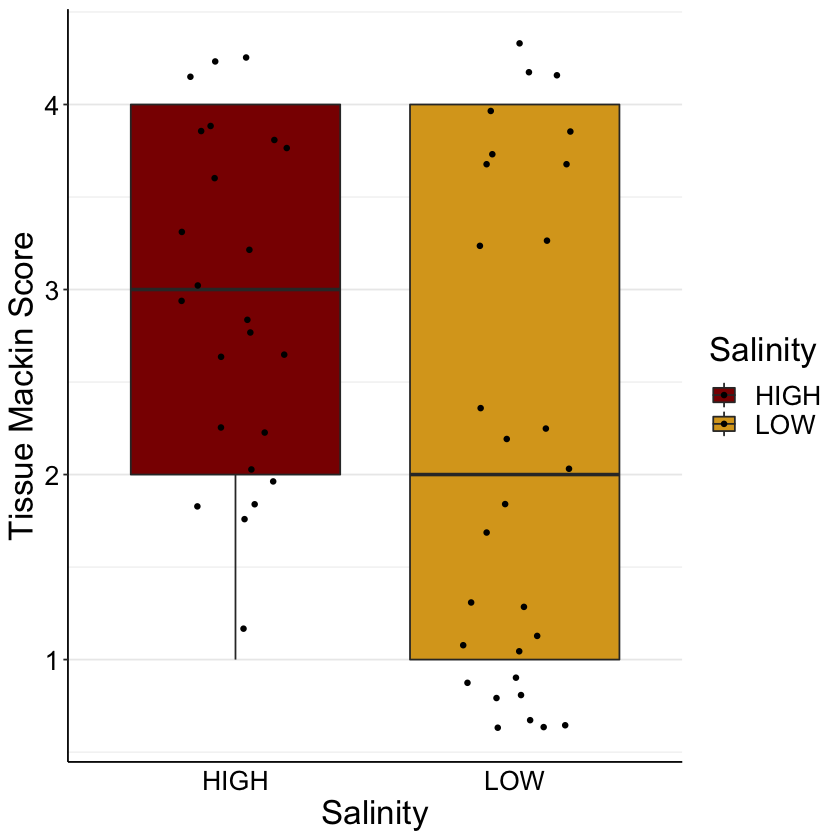

In [99]:
#plot a boxplot
ggplot(mackin, aes(x = Salinity, y = Tissue_sim, fill=Salinity)) +
scale_fill_manual(values=c("darkred", "goldenrod"))+
        geom_boxplot()+
geom_jitter(shape=16, position=position_jitter(0.2))+
theme_bw()+
 theme(legend.position="right", panel.border = element_blank(), 
          panel.grid.major.x = element_blank(), 
          panel.grid.minor.x = element_blank(),
          axis.ticks.x=element_blank(), axis.line=element_line(color="black"), axis.text=element_text(color="black"),
          text = element_text(size=20))+
ylab("Tissue Mackin Score")

In [100]:
mackin$Salinity=factor(mackin$Salinity, levels = c("LOW", "HIGH"))

In [101]:
mackin$Salinity

[1] LOW  LOW  LOW  LOW  LOW  LOW  LOW  LOW  LOW  LOW  LOW  LOW  HIGH LOW  LOW 
[16] HIGH LOW  LOW  HIGH HIGH HIGH LOW  HIGH LOW  HIGH HIGH LOW  HIGH LOW  LOW 
[31] HIGH LOW  LOW  HIGH LOW  HIGH LOW  HIGH HIGH HIGH HIGH LOW  HIGH HIGH HIGH
[46] HIGH HIGH HIGH HIGH HIGH LOW  LOW  LOW 
Levels: LOW HIGH

In [102]:
head(mackin)

,ID,Salinity,TISSUE,Tissue_sim,Tissue_sim2
1,10W,LOW,0.5,1,1
9,11W,LOW,1.0,1,1
17,12W,LOW,1.0,1,1
25,13W,LOW,0.5,1,1
33,14W,LOW,2.0,2,2
41,15W,LOW,4.0,4,4


Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”

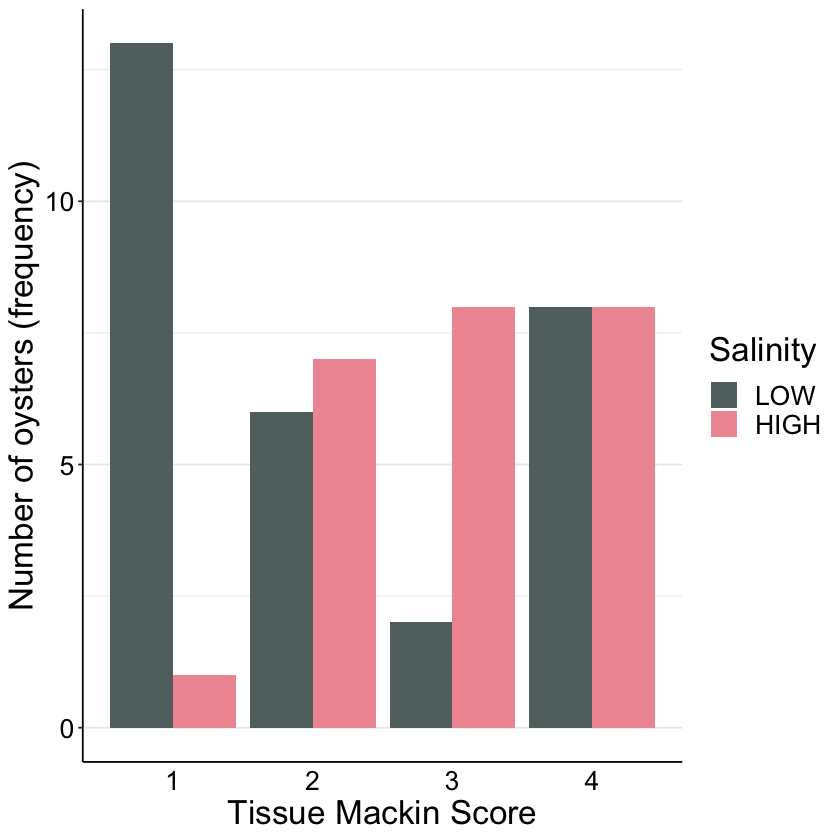

In [105]:
#plot a histogram
ggplot(mackin, aes(x=Tissue_sim, fill=Salinity)) +
  geom_histogram(position="dodge", stat="count")+
scale_fill_manual(values=c("#61716F", "#F199A3"))+
theme_bw()+
 theme(legend.position="right", panel.border = element_blank(), 
          panel.grid.major.x = element_blank(), 
          panel.grid.minor.x = element_blank(),
    
          axis.ticks.x=element_blank(), axis.line=element_line(color="black"), axis.text=element_text(color="black"),
          text = element_text(size=20))+
ylab("Number of oysters (frequency)")+xlab("Tissue Mackin Score")

In [107]:
ggsave(filename = "~/Documents/DE/Shed/Manuscript/Salinity.pdf" )

Saving 7 x 7 in image


two anovas within high and low look at sorry effect of mackin score on and see if the slopes are different 

In [17]:
#make score a factor
mackin$TISSUE=as.factor(as.character(mackin$TISSUE))

logistic regression with mackin score as ordinal response. 

In [18]:
head(mackin)

,ID,Salinity,TISSUE,Tissue_sim,Tissue_sim2
1,10W,LOW,0.5,1,1
9,11W,LOW,1,1,1
17,12W,LOW,1,1,1
25,13W,LOW,0.5,1,1
33,14W,LOW,2,2,2
41,15W,LOW,4,4,4


In [78]:
help(glm)

In [19]:
#run logistic regression
m = polr(TISSUE ~ Salinity, data = mackin, Hess=TRUE)

## view a summary of the model
summary(m)
(ctable = coef(summary(m)))

p = pnorm(abs(ctable[, "t value"]), lower.tail = FALSE) * 2
(ctable =cbind(ctable, "p value" = p))

Call:
polr(formula = TISSUE ~ Salinity, data = mackin, Hess = TRUE)

Coefficients:
             Value Std. Error t value
SalinityHIGH 1.307     0.5191   2.518

Intercepts:
      Value   Std. Error t value
0.5|1 -1.8081  0.5001    -3.6154
1|2   -0.4526  0.3847    -1.1765
2|3    0.7593  0.4083     1.8598
3|4    1.6018  0.4428     3.6170
4|5    3.5955  0.6879     5.2266

Residual Deviance: 172.5363 
AIC: 184.5363 

,Value,Std. Error,t value
SalinityHIGH,1.3070873,0.5190989,2.517993
0.5|1,-1.8081064,0.5001086,-3.615427
1|2,-0.4525697,0.3846789,-1.176487
2|3,0.7592879,0.4082733,1.859754
3|4,1.6017507,0.4428401,3.616996
4|5,3.5954601,0.6879121,5.226627


,Value,Std. Error,t value,p value
SalinityHIGH,1.3070873,0.5190989,2.517993,1.180257e-02
0.5|1,-1.8081064,0.5001086,-3.615427,2.998527e-04
1|2,-0.4525697,0.3846789,-1.176487,2.394003e-01
2|3,0.7592879,0.4082733,1.859754,6.292031e-02
3|4,1.6017507,0.4428401,3.616996,2.980419e-04
4|5,3.5954601,0.6879121,5.226627,1.726301e-07


## Influence of heat on number of cells released. broken up by mackin score of tissue. Survivors only

In [109]:
#take out oysters that survived to end of experiment
survivors=all[all$Survived=="Yes",]


Warning message:
“Removed 231 rows containing missing values (geom_point).”

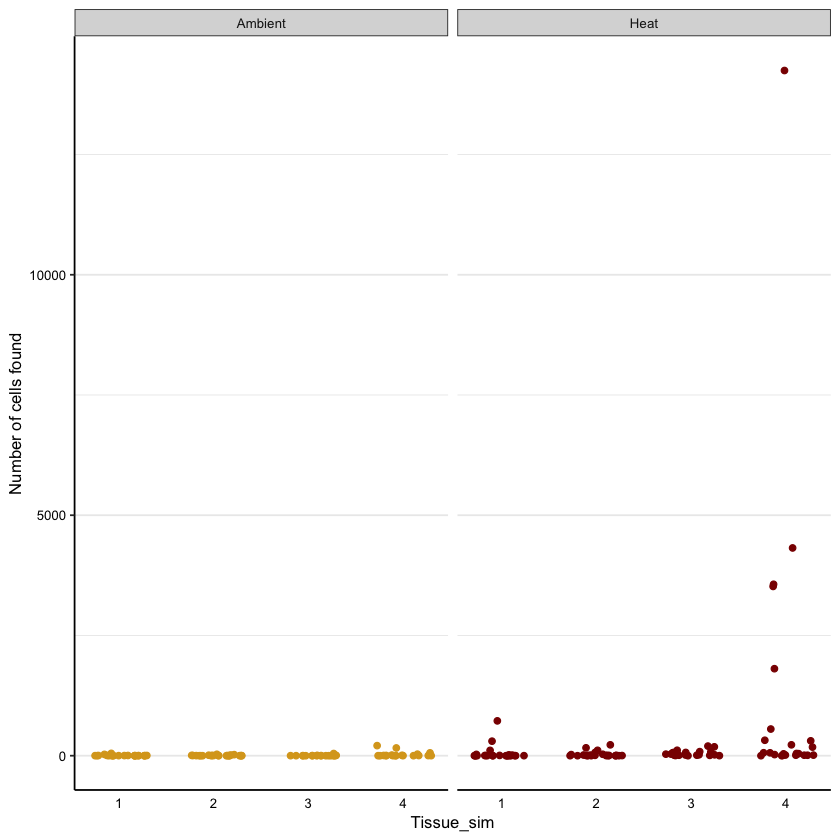

In [21]:
#plot mackin score vs number released
ggplot(survivors, aes(x = Tissue_sim, y = number, col=Treatment, group=ID)) +
scale_color_manual(values=c("goldenrod", "darkred"))+
       geom_jitter(position=position_jitter(0.3))+
#geom_line()+
 facet_grid(. ~ Treatment)+
theme_bw()+
 
theme(legend.position="none", panel.border = element_blank(), 
          panel.grid.major.x = element_blank(), 
          panel.grid.minor.x = element_blank(),
    
          axis.ticks.x=element_blank(), axis.line=element_line(color="black"), axis.text=element_text(color="black"),
          text = element_text(size=10))+
ylab("Number of cells found")

In [110]:
#take the mean for each individual across two trials 
means=as.data.frame(aggregate(number~ID+Treatment, data=survivors, FUN=mean))

In [111]:
#reorganize dataframe so that ambient and heat are in separate columns
means=pivot_wider(means, id_cols=ID, names_from=Treatment, values_from=number)

In [112]:
#remove any nas?
means=na.omit(means)

In [113]:
#how many individuals?
length(unique(means$ID))

[1] 47

In [114]:
#calculate difference between ambient and heated means
means$diff=means$Heat-means$Ambient

In [115]:
#get salinity info out of id code
means$Salinity=ifelse(substr(means$ID,3,3)=="W", "Low", "High")

In [116]:
#combine the differences and the oyster data
diffsm=merge(means, oysters, by="ID")

In [117]:
#transform for plotting
diffsm$logdiff=ifelse(diffsm$diff>0, log10(diffsm$diff+1), ifelse(diffsm$diff==0, 0, -log10(abs(diffsm$diff)+1)))

Warning message in ifelse(diffsm$diff > 0, log10(diffsm$diff + 1), ifelse(diffsm$diff == :
“NaNs produced”

Warning message:
“Removed 3 rows containing missing values (geom_bar).”

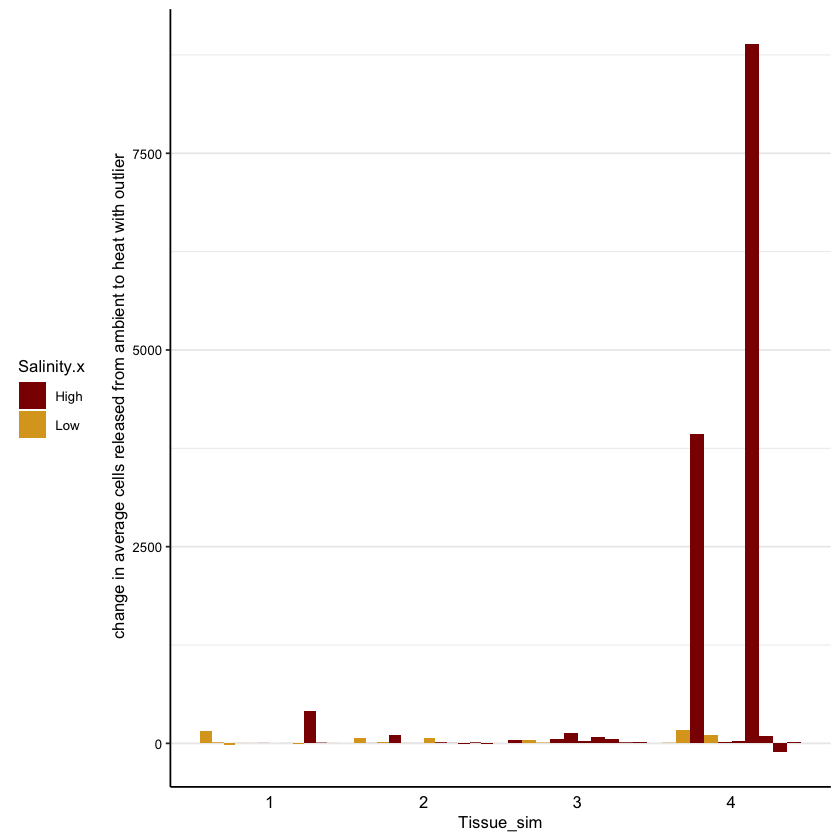

In [30]:
#plot non transformed change
ggplot((diffsm), aes(x = Tissue_sim, y = diff, group=ID, fill=Salinity.x)) +
scale_fill_manual(values=c("darkred", "goldenrod"))+
geom_bar(stat="identity", position="dodge")+
theme_bw()+
 theme(legend.position="left", panel.border = element_blank(), 
          panel.grid.major.x = element_blank(), 
          panel.grid.minor.x = element_blank(),
    
          axis.ticks.x=element_blank(), axis.line=element_line(color="black"), axis.text=element_text(color="black"),
       axis.text.x=element_text(size=10), 
          text = element_text(size=10))+
#ylim(-5,5)+
ylab(" change in average cells released from ambient to heat with outlier")

Warning message:
“Removed 3 rows containing missing values (geom_bar).”

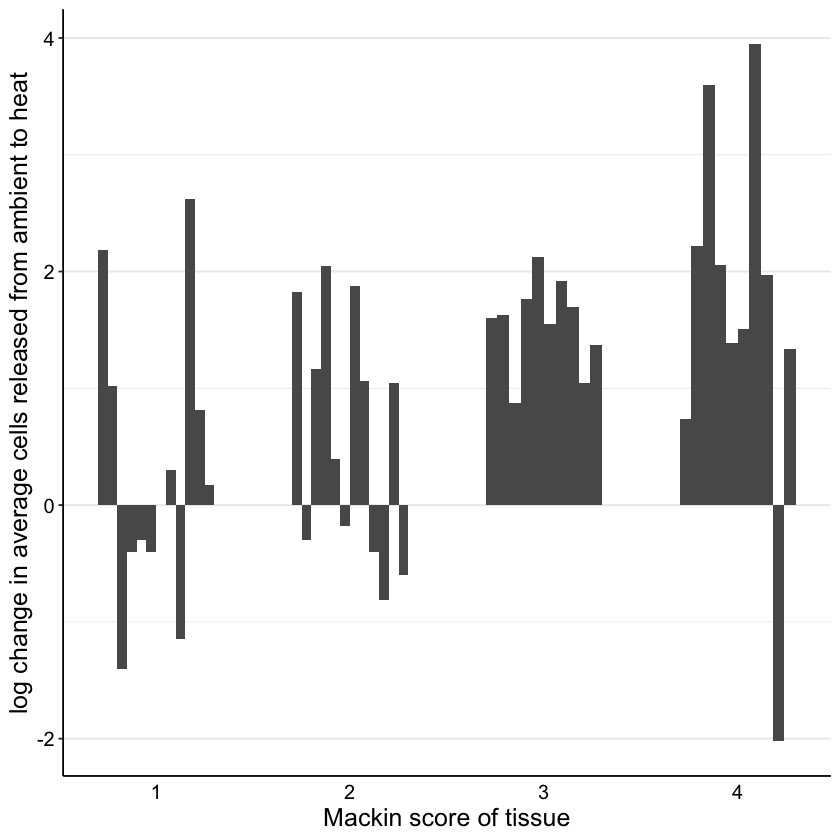

In [118]:
#plot log change
ggplot(diffsm, aes(x = Tissue_sim, y = logdiff, group=ID)) +
#scale_fill_manual(values=c("darkred", "goldenrod"))+
geom_bar(stat="identity", position="dodge", width=0.6)+
theme_bw()+
 theme(legend.position="left", panel.border = element_blank(), 
          panel.grid.major.x = element_blank(), 
          panel.grid.minor.x = element_blank(),
    
          axis.ticks.x=element_blank(), axis.line=element_line(color="black"), axis.text=element_text(color="black"),
         text = element_text(size=15))+
#ylim(-15,10000)+
ylab("log change in average cells released from ambient to heat") +
xlab("Mackin score of tissue")

In [119]:
ggsave(filename = "~/Documents/DE/Shed/Manuscript/Cells_heat-ambient.pdf" )

Saving 7 x 7 in image
Warning message:
“Removed 3 rows containing missing values (geom_bar).”

one sample t test with null as 0. 
run a separate t test, alternatively do a 95% ci and see if they overlap 
plot difference value as function of score. 

Look at relationship between intensity and shedding. if there is a relationship then need to deal with it. maybe an ancova? have to do it separately for each one unless its the same relationship. 

difference value is your dependent variable. Can you build a model that is looking at salinity by intensity? 
y axis is difference between temps. x axis is intensity, graph the two salinity

also could just look at differeence for high and low salniigy
if theres no relationship with intensity, fine to just compare high and low salinity. 

In [32]:
survivors_tissue=survivors[!is.na(survivors$Tissue_sim),]

In [33]:
#look at what the min is so you can transform with everythign positive
min(na.omit(diffsm$diff))

[1] -104

In [34]:
##logtransform for stats
diffsm$pos=(diffsm$diff+105)


In [35]:
test=diffsm$pos

In [36]:
boxcox

function (x, ...) 
UseMethod("boxcox")
<bytecode: 0x7fd081532560>
<environment: namespace:EnvStats>

In [37]:
#try a boxcox transformation
boxcox(diffsm$pos, lambda =  c(-2, 2) , 
    optimize = TRUE, objective.name = "Shapiro-Wilk",
    eps = .Machine$double.eps, include.x = TRUE)


Results of Box-Cox Transformation
---------------------------------

Objective Name:                  Shapiro-Wilk

Data:                            diffsm$pos

Sample Size:                     47

Bounds for Optimization:         lower = -2
                                 upper =  2

Optimal Value:                   lambda = 0.03327076

Value of Objective:              Shapiro-Wilk = 0.6149918


In [38]:
diffsm$trans=boxcoxTransform(diffsm$pos, lambda= 0.03327076)

In [39]:
boxcoxTransform(diffsm$pos, lambda= 0.03327076)

[1]  6.089662  5.134877  5.607636  5.082638  5.022441  4.724778  5.175105
 [8]  6.153751  9.565293  5.894193  5.016817  5.270198  5.404305  5.691448
[15]  5.336934  6.193276  5.877584  5.424618  5.022441 10.632731  5.772950
[22]  5.050176  5.028039  5.016817  5.033612  0.000000  5.658606  5.044679
[29]  5.242444  5.103805  5.543539  4.879643  5.994506  6.956745  5.366868
[36]  5.145060  5.093268  5.016817  5.717105  5.483605  5.315093  4.970855
[43]  5.139979  5.139979  5.261017  5.039158  4.999786

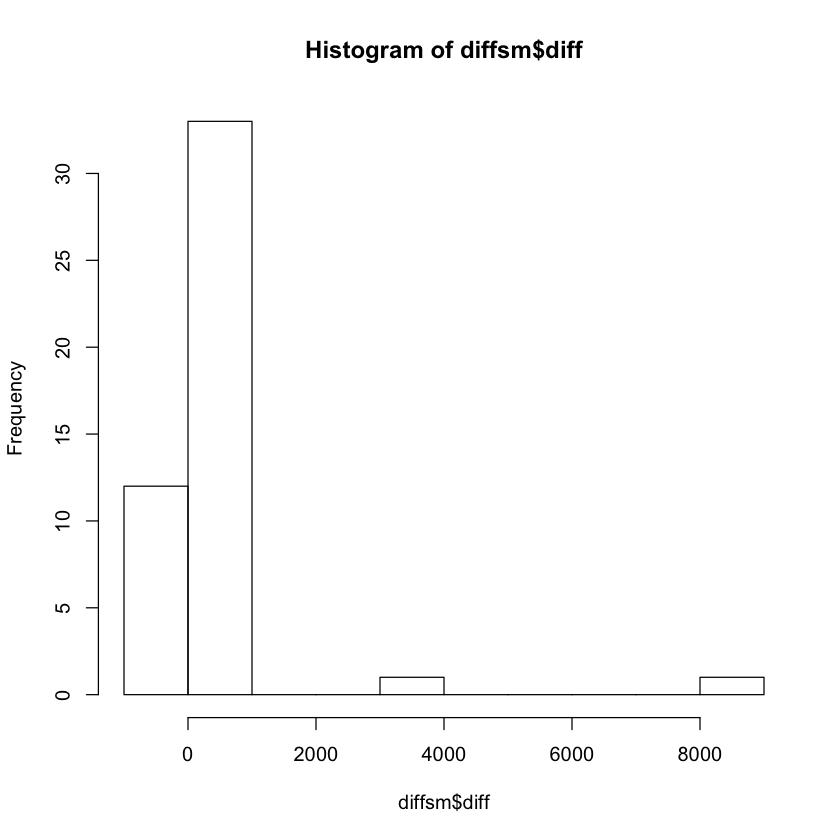

In [40]:
hist(diffsm$diff)

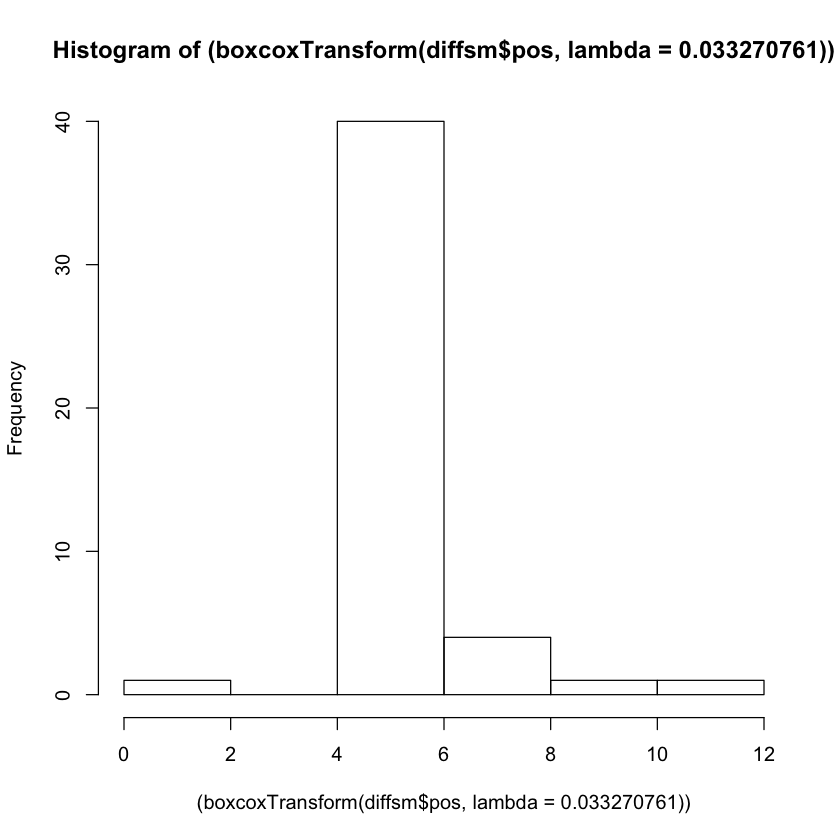

In [41]:
hist((boxcoxTransform(diffsm$pos, lambda=0.033270761)))

In [42]:
boxcoxTransform(105, lambda= 0.03327076)

[1] 5.033612

In [79]:
help(t.test)

In [43]:
t.test(boxcoxTransform(diffsm$pos, lambda= 0.03327076), mu=5.03361156327713)


	One Sample t-test

data:  boxcoxTransform(diffsm$pos, lambda = 0.03327076)
t = 2.1548, df = 46, p-value = 0.03645
alternative hypothesis: true mean is not equal to 5.033612
95 percent confidence interval:
 5.061289 5.846578
sample estimates:
mean of x 
 5.453934 


In [44]:
anovasal=lm(data=(diffsm), trans~Salinity.x*Tissue_sim)
summary(anovasal)


Call:
lm(formula = trans ~ Salinity.x * Tissue_sim, data = (diffsm))

Residuals:
    Min      1Q  Median      3Q     Max 
-5.8098 -0.3540 -0.1216  0.0385  4.8229 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)               4.94018    0.75872   6.511 9.04e-08 ***
Salinity.xLow             0.01028    1.02551   0.010    0.992    
Tissue_sim                0.21741    0.26580   0.818    0.418    
Salinity.xLow:Tissue_sim -0.04272    0.40070  -0.107    0.916    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.406 on 40 degrees of freedom
  (3 observations deleted due to missingness)
Multiple R-squared:  0.03063,	Adjusted R-squared:  -0.04207 
F-statistic: 0.4213 on 3 and 40 DF,  p-value: 0.7387


In [45]:
unique()

ERROR: Error in is.factor(x): argument "x" is missing, with no default


difference value between ambient and heat, expect to be zero if theres no effect. need to account for oyster ID. 

Notes from talking to Lisa:
Is there info on metabolic rate of ectotherm/oysters and temperature Growth rate or filtration rate? 
Filtration and release rates as a function of temperature, plus pathogen infection probability. 
ARe pathogens growing faster, or are they infecting more efficiently, or are they 
Also focusing more on the host makes it easier to translate to alternate hosts
Encorporate salinity just into the pathogen dynamics? 
Can't just be like temperature only affects oysters and salinity only affects the pathogen. 
Look at temperature effects on perkinsus marinus. 

See if there's a metabolic response to salinity on the oyster... Need to 

Are there papers about Perkinsus and temperature? 

I decide if there are more experiments to tease apart hypotheses. 

What is the tempareture range 


## Maximum number of cells released


Influence of days before death on #cells released (for last day) 

Compare last value of ones that survived to ones that died. also compare to gapers?



In [120]:
length(unique(all$ID))

[1] 71

In [121]:
dead=all[!is.na(all$Mortality_day),]

In [122]:
length(unique(dead$ID))

[1] 22

In [123]:
dead$Day=as.numeric(as.character(dead$Day))
dead$Mortality_day=as.numeric(as.character(dead$Mortality_day))

In [124]:
dead$time_death=dead$Mortality_day-dead$Day

In [125]:
dead$dummy=1

In [126]:
dead$percent=dead$number

In [127]:
total=aggregate(number~ID, data=dead, FUN=sum)

In [128]:
dead=merge(dead, total, by="ID")

In [129]:
dead$percent=(dead$number.x/dead$number.y)*100

In [130]:
dead=dead[dead$Survived=="No",]

In [131]:
table(dead$Salinity)


HIGH  LOW 
  88   64 

Warning message:
“Removed 114 rows containing missing values (geom_point).”

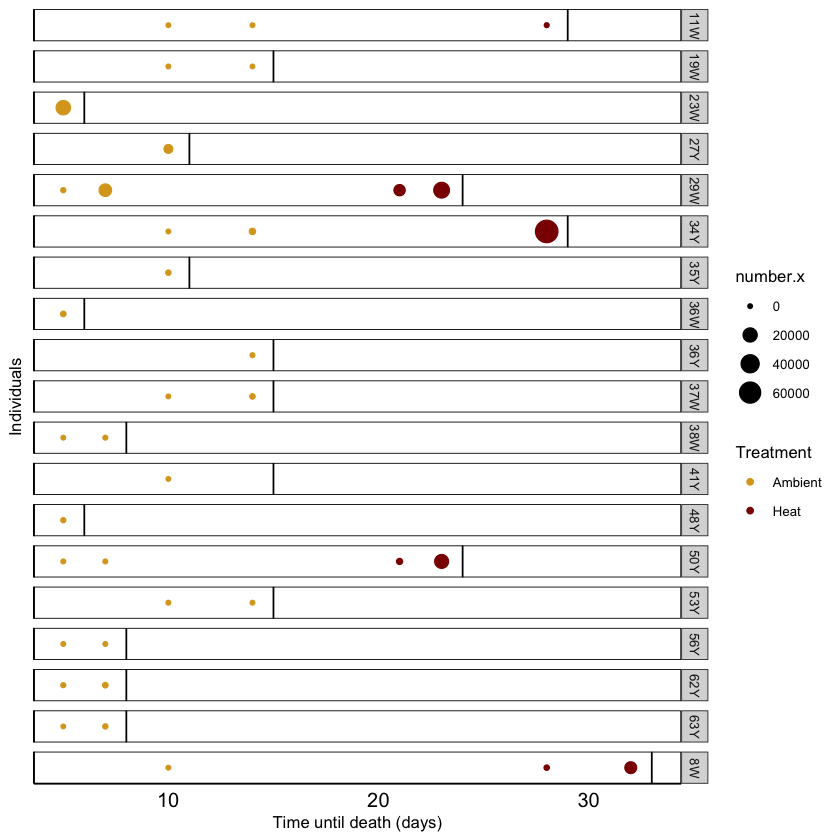

In [132]:
#plot mackin score vs number released
ggplot(dead, aes(x = Day, y=dummy, size = number.x, col=Treatment, group=ID)) +
scale_color_manual(values=c("goldenrod", "darkred"))+
      geom_point()+
geom_vline(aes(xintercept=Mortality_day))+
 facet_grid( ID ~ .)+
theme_bw()+
theme(legend.position="right", 
      panel.border = element_rect(color="black"), 
          panel.grid.major = element_blank(), 
          panel.grid.minor = element_blank(),
        axis.text.y=element_blank(),
          axis.ticks=element_blank(), axis.line=element_line(color="black"), axis.text=element_text(color="black", size=12),
          text = element_text(size=10))+
ylab("Individuals")+
xlab("Time until death (days)")

Warning message:
“Removed 126 rows containing missing values (geom_point).”

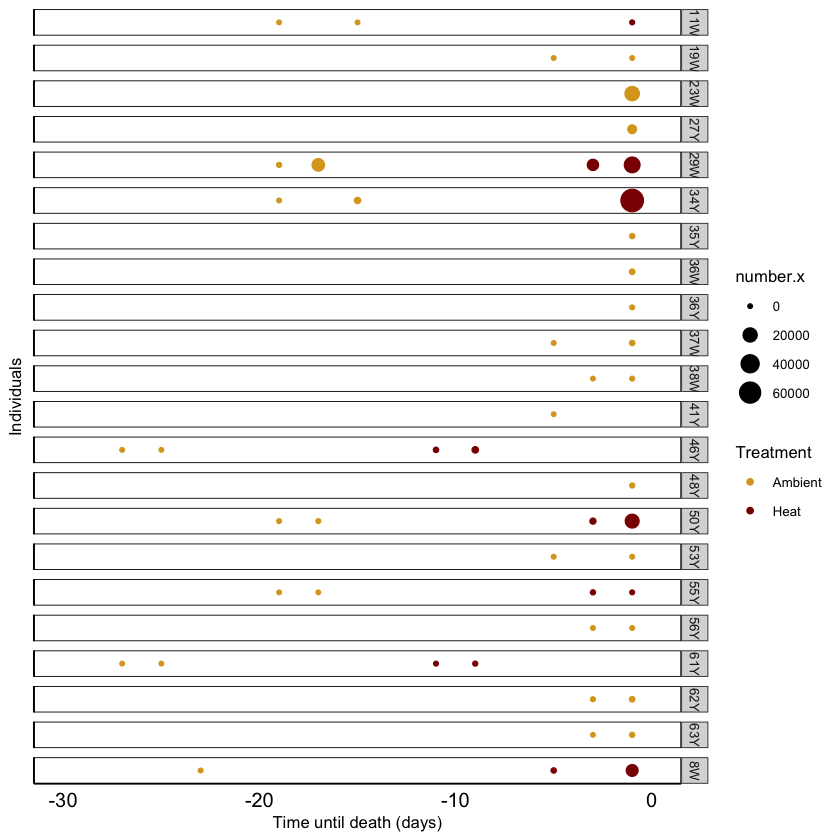

In [57]:
#plot mackin score vs number released
ggplot(dead, aes(x = -time_death, y=dummy, size = number.x, col=Treatment, group=ID)) +
scale_color_manual(values=c("goldenrod", "darkred"))+
      geom_point()+
#geom_line()+
 facet_grid( ID ~ .)+
theme_bw()+
theme(legend.position="right", 
      panel.border = element_rect(color="black"), 
          panel.grid.major = element_blank(), 
          panel.grid.minor = element_blank(),
        axis.text.y=element_blank(),
          axis.ticks=element_blank(), axis.line=element_line(color="black"), axis.text=element_text(color="black", size=12),
          text = element_text(size=10))+
xlim(-30,0)+
ylab("Individuals")+
xlab("Time until death (days)")

Warning message:
“Removed 127 rows containing missing values (geom_point).”

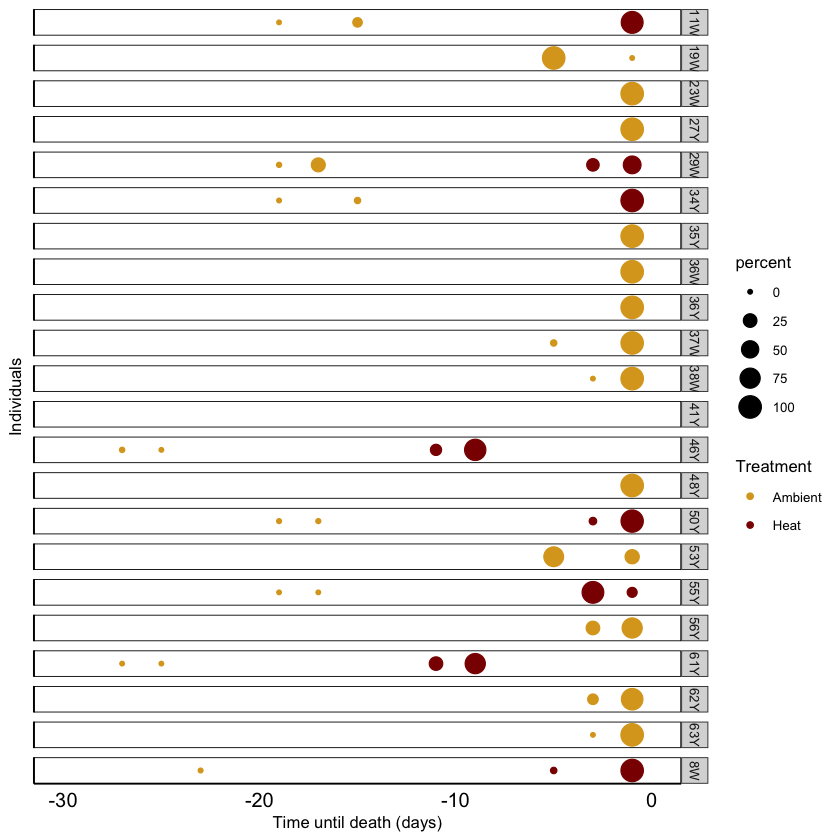

In [58]:
#plot mackin score vs number released
ggplot(dead, aes(x = -time_death, y=dummy, size = percent, col=Treatment, group=ID)) +
scale_color_manual(values=c("goldenrod", "darkred"))+
      geom_point()+
#geom_line()+
 facet_grid( ID ~ .)+
theme_bw()+
theme(legend.position="right", 
      panel.border = element_rect(color="black"), 
          panel.grid.major = element_blank(), 
          panel.grid.minor = element_blank(),
        axis.text.y=element_blank(),
          axis.ticks=element_blank(), axis.line=element_line(color="black"), axis.text=element_text(color="black", size=12),
          text = element_text(size=10))+
xlim(-30,0)+
ylab("Individuals")+
xlab("Time until death (days)")

In [59]:
head(all)

ID,Treatment,Day,number,Salinity,TISSUE,MORTALITY.DATE,Gape,Mortality,Gape_day,Mortality_day,Four_trials,Survived,Tissue_sim,Trial,Tissue_sim2
10W,Ambient,5,NA,LOW,0.5,,NA,NA,NA,NA,No,Yes,1,one,1
10W,Ambient,7,NA,LOW,0.5,,NA,NA,NA,NA,No,Yes,1,two,1
10W,Ambient,10,NA,LOW,0.5,,NA,NA,NA,NA,No,Yes,1,one,1
10W,Ambient,14,NA,LOW,0.5,,NA,NA,NA,NA,No,Yes,1,two,1
10W,Heat,21,27,LOW,0.5,,NA,NA,NA,NA,No,Yes,1,one,1
10W,Heat,23,0,LOW,0.5,,NA,NA,NA,NA,No,Yes,1,two,1


In [133]:
maxcells=aggregate(number~ID, data=all, FUN=max)

In [134]:
colnames(maxcells)=c("ID", "number")

In [135]:
maxfull=merge(maxcells, all, by=c("ID", "number"))

In [136]:
maxfull=maxfull[maxfull$number!=0,]

In [137]:
maxfull$Survived=ifelse(maxfull$Survived=="Yes", "Survivors", "Non-Survivors")

In [138]:
maxfull$Day=as.numeric(as.character(maxfull$Day))
maxfull$Deathday=maxfull$Mortality_day-maxfull$Day

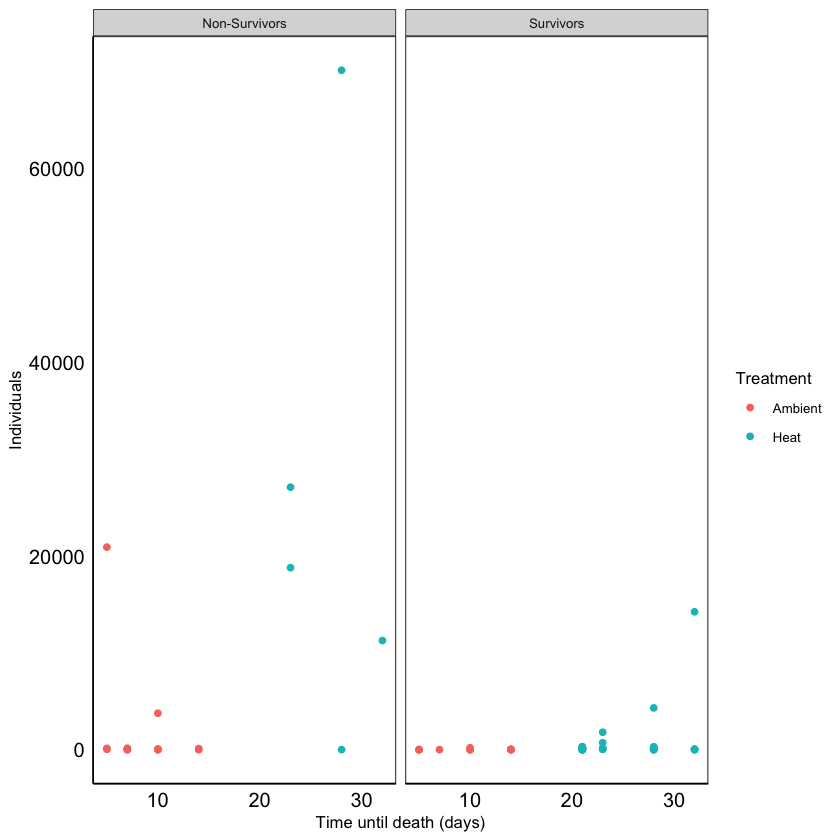

In [139]:
#plot mackin score vs number released
ggplot(maxfull, aes(x = Day, y=number, col=Treatment, group=ID)) +
#scale_color_manual(values=c("goldenrod", "darkred"))+
      geom_point()+
#geom_line()+
 facet_grid( . ~ Survived)+
theme_bw()+
theme(legend.position="right", 
      panel.border = element_rect(color="black"), 
          panel.grid.major = element_blank(), 
          panel.grid.minor = element_blank(),
        #axis.text.y=element_blank(),
          axis.ticks=element_blank(), axis.line=element_line(color="black"), axis.text=element_text(color="black", size=12),
          text = element_text(size=10))+
ylab("Individuals")+
xlab("Time until death (days)")

In [140]:
table(maxfull$Treatment, maxfull$Survived)

         
          Non-Survivors Survivors
  Ambient            13        12
  Heat                5        39

In [39]:
39/(39+12)

[1] 0.7647059

In [68]:
maxfull[maxfull$Survived=="Non-Survivors",]

,ID,number,Treatment,Day,Salinity,TISSUE,MORTALITY.DATE,Gape,Mortality,Gape_day,Mortality_day,Four_trials,Survived,Tissue_sim,Trial,Tissue_sim2,Deathday
2,11W,13,Heat,28,LOW,1,7-Nov,7-Nov,8-Nov,28,29,No,Non-Survivors,1,one,1,1
9,19W,1,Ambient,10,LOW,NA,20-Oct,NA,25-Oct,NA,15,No,Non-Survivors,NA,one,NA,5
13,23W,20925,Ambient,5,LOW,NA,17-Oct,NA,16-Oct,NA,6,No,Non-Survivors,NA,one,NA,1
17,27Y,3771,Ambient,10,HIGH,NA,20-Oct,NA,21-Oct,NA,11,No,Non-Survivors,NA,one,NA,1
20,29W,27117,Heat,23,LOW,5,2-Nov,2-Nov,3-Nov,23,24,Yes,Non-Survivors,4,two,5,1
30,34Y,70173,Heat,28,HIGH,4,7-Nov,7-Nov,8-Nov,28,29,No,Non-Survivors,4,one,4,1
32,35Y,87,Ambient,10,HIGH,NA,24-Oct,NA,21-Oct,NA,11,No,Non-Survivors,NA,one,NA,1
33,36W,146,Ambient,5,LOW,NA,17-Oct,NA,16-Oct,NA,6,No,Non-Survivors,NA,one,NA,1
34,36Y,6,Ambient,14,HIGH,NA,24-Oct,NA,25-Oct,NA,15,No,Non-Survivors,NA,two,NA,1
35,37W,118,Ambient,14,LOW,NA,24-Oct,24-Oct,25-Oct,14,15,No,Non-Survivors,NA,two,NA,1


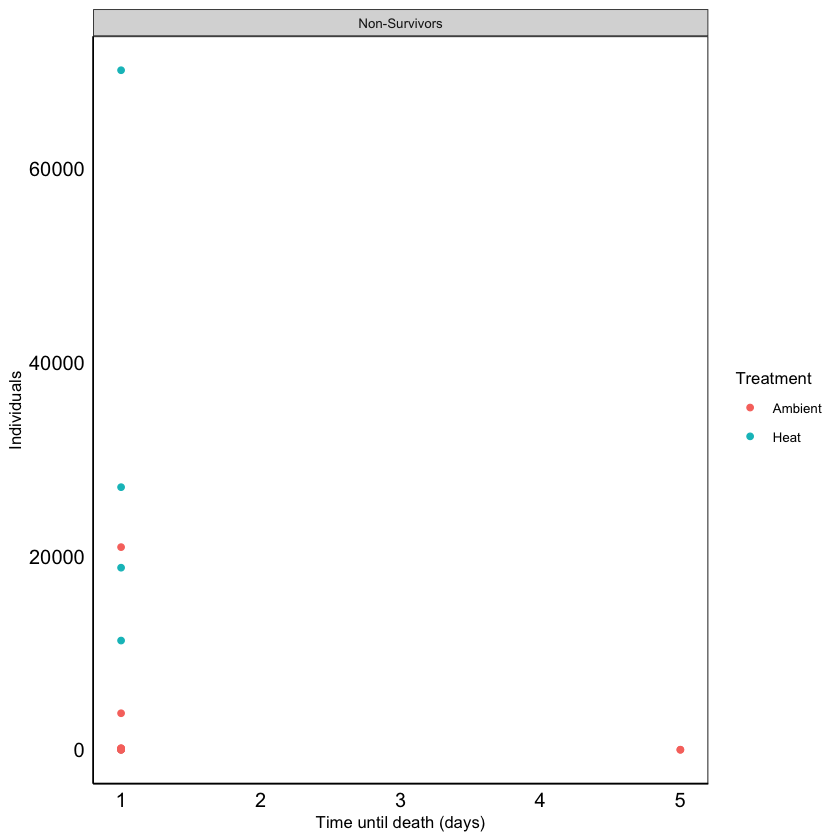

In [69]:
#plot mackin score vs number released
ggplot(maxfull[maxfull$Survived=="Non-Survivors",], aes(x = Deathday, y=number, col=Treatment, group=ID)) +
#scale_color_manual(values=c("goldenrod", "darkred"))+
geom_point()+
 facet_grid( . ~ Survived)+
theme_bw()+
theme(legend.position="right", 
      panel.border = element_rect(color="black"), 
          panel.grid.major = element_blank(), 
          panel.grid.minor = element_blank(),
        #axis.text.y=element_blank(),
          axis.ticks=element_blank(), axis.line=element_line(color="black"), axis.text=element_text(color="black", size=12),
          text = element_text(size=10))+
ylab("Individuals")+
xlab("Time until death (days)")

Set up so that you can more clearly see individuals--heatmap? each row is an individual size of dot= amount of cells released

Compare living and dead. frequency? boxplot? 
Cumulative total of cells released for an individual oyster. total for respective treatments. 


MAximum number of cells released?
if died had to have measurment within x number of days of death. 
is maximum higher for those that died than those that survived? 



In [70]:
#try a boxcox transformation
boxcox(maxfull$number, lambda =  c(-2, 2) , 
    optimize = TRUE, objective.name = "Shapiro-Wilk", 
    eps = .Machine$double.eps, include.x = TRUE)


Results of Box-Cox Transformation
---------------------------------

Objective Name:                  Shapiro-Wilk

Data:                            maxfull$number

Sample Size:                     69

Bounds for Optimization:         lower = -2
                                 upper =  2

Optimal Value:                   lambda = -0.1225669

Value of Objective:              Shapiro-Wilk = 0.9785698


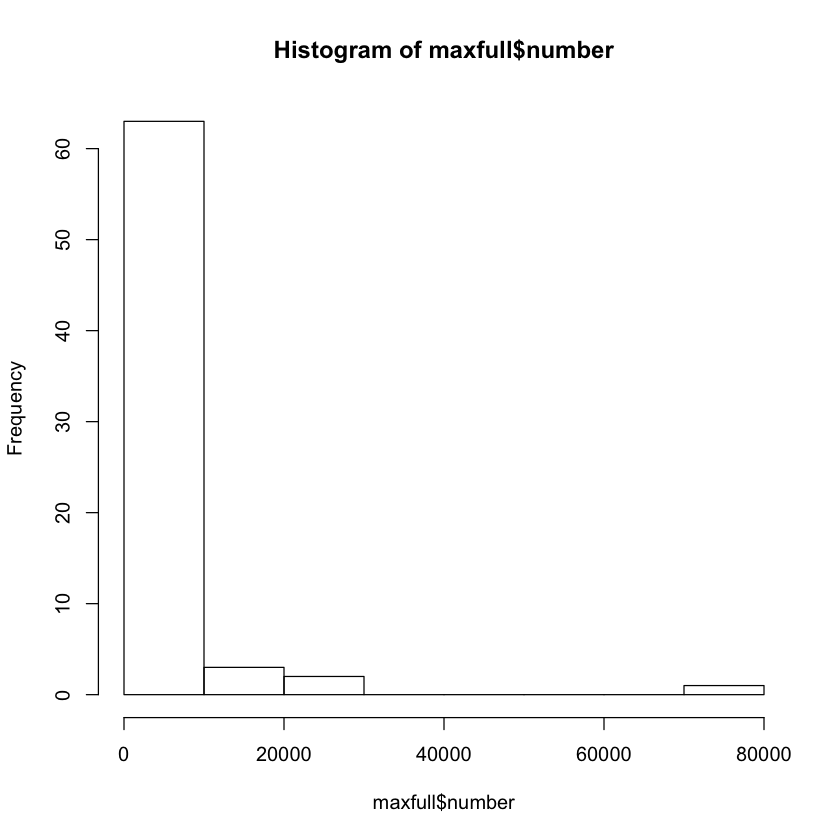

In [71]:
hist(maxfull$number)

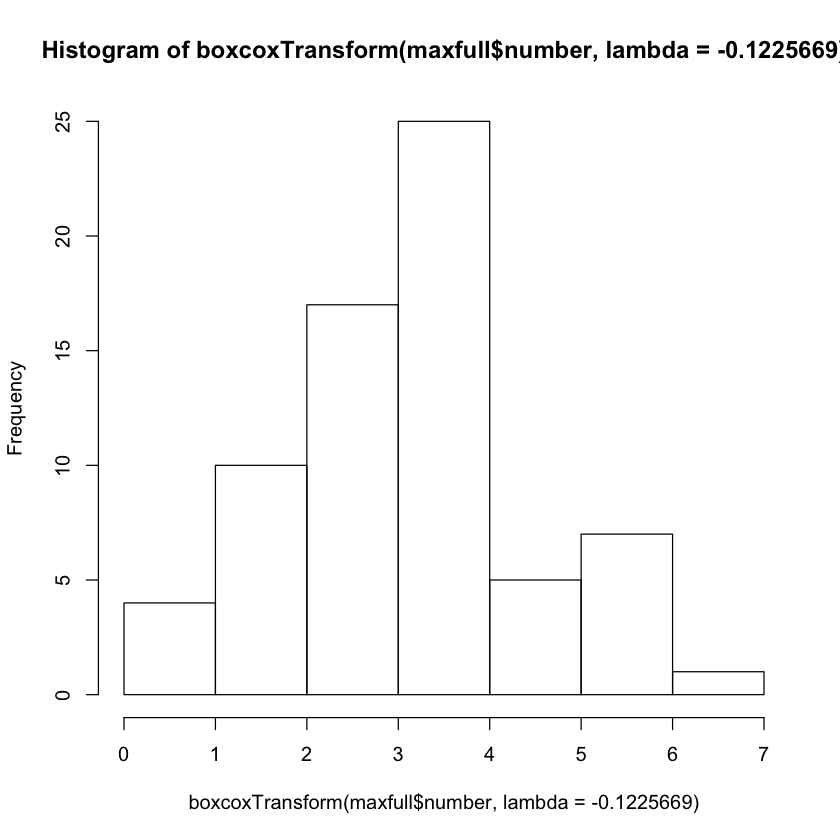

In [72]:
hist(boxcoxTransform(maxfull$number, lambda=-0.1225669))

In [108]:
instances=(table(maxfull$Survived, maxfull$Treatment, maxfull$Trial))
instances
#chisq=chisq.test(instances)


, ,  = one

               
                Ambient Heat
  Non-Survivors       7    2
  Survivors           6   29

, ,  = two

               
                Ambient Heat
  Non-Survivors       6    3
  Survivors           6   10


In [88]:
18*25/69
51*45/69
13+5+12+39

[1] 6.521739

[1] 33.26087

[1] 69

Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”

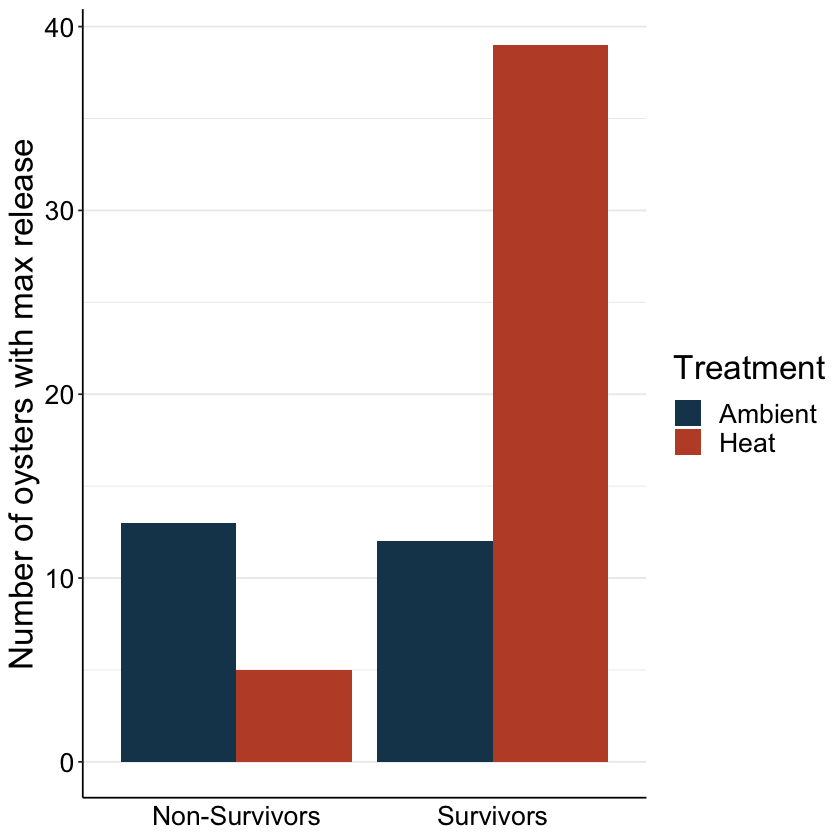

In [141]:
#plot a histogram
ggplot(maxfull, aes(x=Survived, fill=Treatment)) +
  geom_histogram(position="dodge", stat="count")+
scale_fill_manual(values=c("#18435A", "#BF4E30"))+
theme_bw()+
 theme(legend.position="right", panel.border = element_blank(), 
          panel.grid.major.x = element_blank(), 
          panel.grid.minor.x = element_blank(),
         axis.title.x = element_blank(),
          axis.ticks.x=element_blank(), axis.line=element_line(color="black"), axis.text=element_text(color="black"),
          text = element_text(size=20))+ ylab("Number of oysters with max release")

For survivors, the maximum release usually occured during a heated treatment. For non-survivors, the maximum was slightly more likely to occur during an ambient treatment. How do I do these stats??


Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”Warning message:
“Removed 2 rows containing non-finite values (stat_count).”

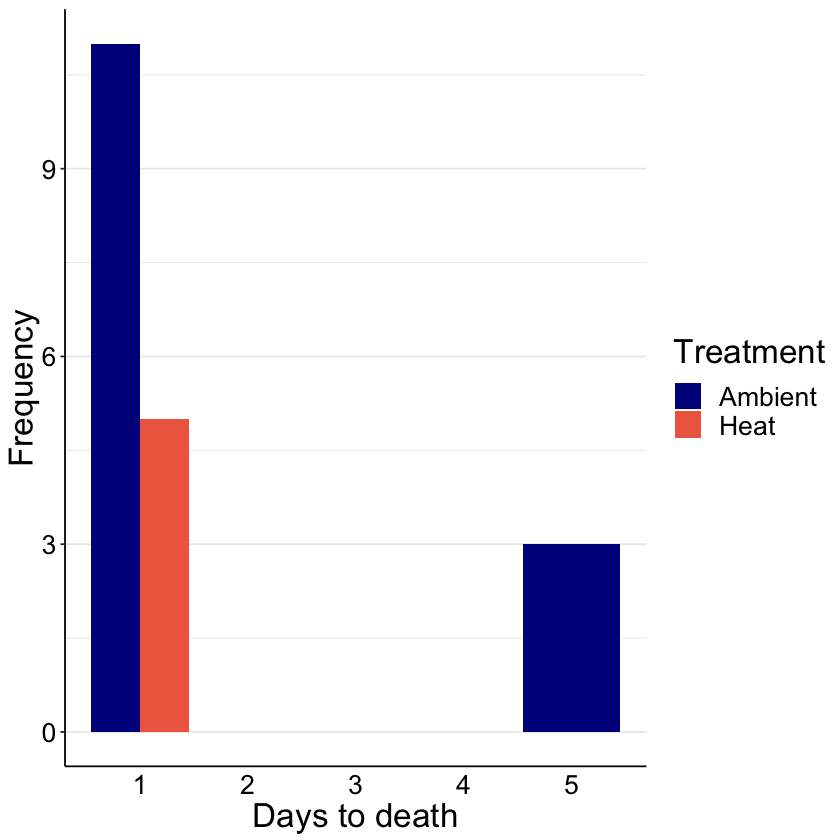

In [100]:
#plot a histogram
ggplot(maxfull[maxfull$Survived=="No",], aes(x=Deathday, fill=Treatment)) +
  geom_histogram(position="dodge", stat="count")+
scale_fill_manual(values=c("darkblue", "coral2"))+
theme_bw()+
 theme(legend.position="right", panel.border = element_blank(), 
          panel.grid.major.x = element_blank(), 
          panel.grid.minor.x = element_blank(),
    
          axis.ticks.x=element_blank(), axis.line=element_line(color="black"), axis.text=element_text(color="black"),
          text = element_text(size=20))+
ylab("Frequency")+xlab("Days to death")

15/18 of the non-survivors released their maximum number of cells 1 day before dying

In [63]:
maxfull$numtrans=boxcoxTransform(maxfull$number, lambda=-0.1225669)

In [64]:
maxfull$Survived=as.factor(maxfull$Survived)
maxfull$Treatment=as.factor(maxfull$Treatment)


In [69]:
maxanova=glm(number~Treatment*Survived, data=maxfull)
summary(maxanova)


Call:
glm(formula = number ~ Treatment * Survived, data = maxfull)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-25463    -617    -561     -26   44697  

Coefficients:
                                Estimate Std. Error t value Pr(>|t|)    
(Intercept)                         1948       2038   0.956    0.343    
TreatmentHeat                      23528       3866   6.086 6.90e-08 ***
SurvivedSurvivors                  -1918       2941  -0.652    0.517    
TreatmentHeat:SurvivedSurvivors   -22929       4564  -5.024 4.21e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for gaussian family taken to be 53977654)

    Null deviance: 6361402175  on 68  degrees of freedom
Residual deviance: 3508547480  on 65  degrees of freedom
AIC: 1430.2

Number of Fisher Scoring iterations: 2


In [118]:
require(multcomp)

Loading required package: multcomp
Loading required package: mvtnorm
Loading required package: survival
Loading required package: TH.data

Attaching package: ‘TH.data’

The following object is masked from ‘package:MASS’:

    geyser



In [142]:
tmp = expand.grid(Treatment = unique(maxfull$Treatment), Survived = unique(maxfull$Survived)) 
X = model.matrix(~ Treatment * Survived, data = tmp)
glht(maxanova, linfct = X)


	 General Linear Hypotheses

Linear Hypotheses:
       Estimate
1 == 0    628.9
2 == 0     30.0
3 == 0  25476.2
4 == 0   1948.2


In [146]:
Tukey

,Ambient,Heat
Heat - Ambient,-1,1


In [159]:
Tukey = contrMat(table(maxfull$Treatment), "Tukey")
K1 = cbind(Tukey, matrix(0, nrow = nrow(Tukey), ncol = ncol(Tukey)))
rownames(K1) = paste(levels(maxfull$Survived)[1], rownames(K1), sep = ":")
K2 = cbind(matrix(0, nrow = nrow(Tukey), ncol = ncol(Tukey)), Tukey)
rownames(K2) = paste(levels(maxfull$Survived)[2], rownames(K2), sep = ":")
K = rbind(K1, K2)
colnames(K) = c(colnames(Tukey), colnames(Tukey))

In [170]:
levels(maxfull$TS)

[1] "Ambient.Non-Survivors" "Heat.Non-Survivors"    "Ambient.Survivors"    
[4] "Heat.Survivors"

In [145]:
maxfull$TS = with(maxfull, interaction(Treatment, Survived))
cell = lm(number ~ TS - 1, data = maxfull)
summary(glht(cell, linfct = K))


	 Simultaneous Tests for General Linear Hypotheses

Fit: lm(formula = number ~ TS - 1, data = maxfull)

Linear Hypotheses:
                                  Estimate Std. Error t value Pr(>|t|)    
Non-Survivors:Heat - Ambient == 0  23528.0     3866.2   6.086 1.38e-07 ***
Survivors:Heat - Ambient == 0        598.9     2425.3   0.247    0.962    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
(Adjusted p values reported -- single-step method)


In [172]:
summary(cell)


Call:
lm(formula = number ~ TS - 1, data = maxfull)

Residuals:
   Min     1Q Median     3Q    Max 
-25463   -617   -561    -26  44697 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
TSAmbient.Non-Survivors     1948       2038   0.956    0.343    
TSHeat.Non-Survivors       25476       3286   7.754 7.99e-11 ***
TSAmbient.Survivors           30       2121   0.014    0.989    
TSHeat.Survivors             629       1176   0.535    0.595    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 7347 on 65 degrees of freedom
Multiple R-squared:  0.4854,	Adjusted R-squared:  0.4538 
F-statistic: 15.33 on 4 and 65 DF,  p-value: 7.022e-09


ok, so heat and ambient are different for non-survivors 

In [56]:
means=as.data.frame(aggregate(number~Treatment+Survived, data=maxfull, FUN=mean))

In [53]:
maxes=as.data.frame(aggregate(number~Treatment+Survived, data=maxfull, FUN=max))

In [54]:
mins=as.data.frame(aggregate(number~Treatment+Survived, data=maxfull, FUN=min))

In [57]:
mins
maxes
means

Treatment,Survived,number
Ambient,Non-Survivors,1
Heat,Non-Survivors,13
Ambient,Survivors,1
Heat,Survivors,1


Treatment,Survived,number
Ambient,Non-Survivors,20925
Heat,Non-Survivors,70173
Ambient,Survivors,209
Heat,Survivors,14247


Treatment,Survived,number
Ambient,Non-Survivors,1948.1538
Heat,Non-Survivors,25476.2000
Ambient,Survivors,30.0000
Heat,Survivors,628.9487


In [62]:
maxfull[order(-maxfull$number),]

,ID,number,Treatment,Day,Salinity,TISSUE,MORTALITY.DATE,Gape,Mortality,Gape_day,Mortality_day,Four_trials,Survived,Tissue_sim,Trial,Deathday
30,34Y,70173,Heat,28,HIGH,4,7-Nov,7-Nov,8-Nov,28,29,No,Non-Survivors,4,one,1
20,29W,27117,Heat,23,LOW,5,2-Nov,2-Nov,3-Nov,23,24,Yes,Non-Survivors,4,two,1
13,23W,20925,Ambient,5,LOW,NA,17-Oct,NA,16-Oct,NA,6,No,Non-Survivors,NA,one,1
60,50Y,18801,Heat,23,HIGH,4,2-Nov,2-Nov,3-Nov,23,24,Yes,Non-Survivors,4,two,1
36,37Y,14247,Heat,32,HIGH,4,,NA,NA,NA,NA,No,Survivors,4,two,NA
75,8W,11277,Heat,32,LOW,4,11-Nov,11-Nov,12-Nov,32,33,No,Non-Survivors,4,two,1
15,26Y,4320,Heat,28,HIGH,4,,NA,NA,NA,NA,Yes,Survivors,4,one,NA
17,27Y,3771,Ambient,10,HIGH,NA,20-Oct,NA,21-Oct,NA,11,No,Non-Survivors,NA,one,1
6,15W,1809,Heat,23,LOW,4,,NA,NA,NA,NA,No,Survivors,4,two,NA
55,46Y,724,Heat,23,HIGH,1,11-Nov,NA,11-Nov,NA,32,Yes,Survivors,1,two,9


In [143]:
meds$label=c("A", "B", "A", "A")

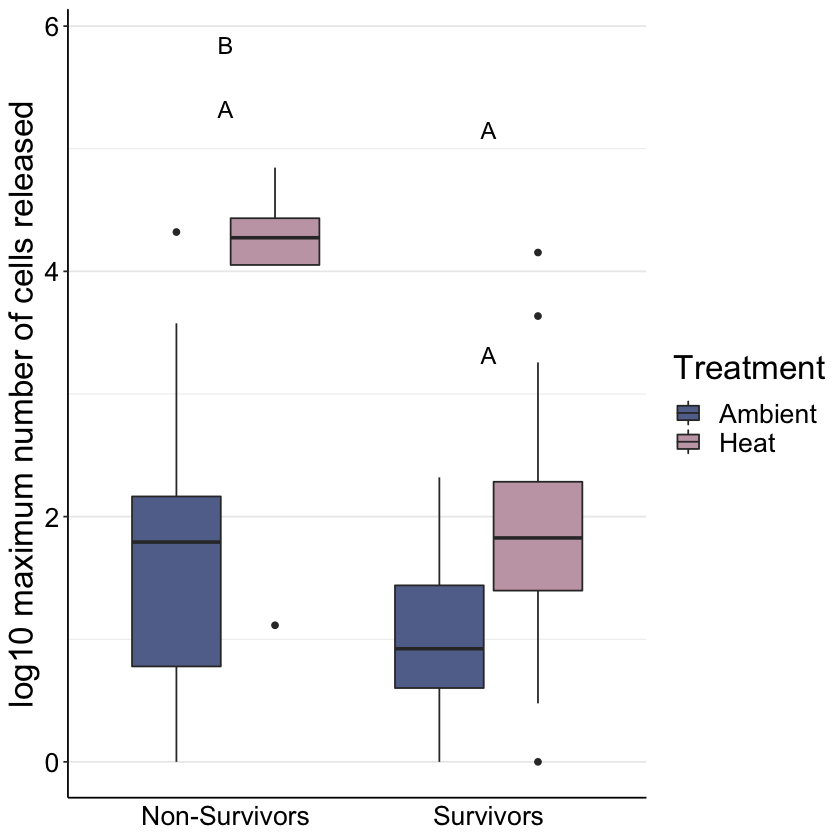

In [145]:
#plot a boxplot
ggplot(maxfull, aes(x = Survived, y = log10(number), fill=Treatment)) +
scale_fill_manual(values=c("#63719A", "#C5A5B3"))+
geom_text(data=meds, aes(x=Survived, y=log10(number)+1, label=label), col='black', size=5)+
geom_boxplot()+
theme_bw()+
 theme(legend.position="right", panel.border = element_blank(), 
          panel.grid.major.x = element_blank(), 
          panel.grid.minor.x = element_blank(),
            axis.title.x = element_blank(),
          axis.ticks.x=element_blank(), axis.line=element_line(color="black"), axis.text=element_text(color="black"),
          text = element_text(size=20))+
ylab("log10 maximum number of cells released") 


In [146]:
ggsave(filename = "~/Documents/DE/Shed/Manuscript/Max_cells.pdf")

Saving 7 x 7 in image


In [168]:
test=cbind(as.numeric(all$TISSUE), as.numeric(all$Day))

In [163]:
test=as.matrix(as.numeric(as.character(test)))

In [172]:
colSums(test)

[1]   NA 9940

In [173]:
rowSums(test)

[1]  5.5  7.5 10.5 14.5 21.5 23.5 28.5 32.5  6.0  8.0 11.0 15.0 22.0 24.0 29.0
 [16] 33.0  6.0  8.0 11.0 15.0 22.0 24.0 29.0 33.0  5.5  7.5 10.5 14.5 21.5 23.5
 [31] 28.5 32.5  7.0  9.0 12.0 16.0 23.0 25.0 30.0 34.0  9.0 11.0 14.0 18.0 25.0
 [46] 27.0 32.0 36.0  9.0 11.0 14.0 18.0 25.0 27.0 32.0 36.0  9.0 11.0 14.0 18.0
 [61] 25.0 27.0 32.0 36.0   NA   NA   NA   NA   NA   NA   NA   NA  7.0  9.0 12.0
 [76] 16.0 23.0 25.0 30.0 34.0  6.0  8.0 11.0 15.0 22.0 24.0 29.0 33.0  7.0  9.0
 [91] 12.0 16.0 23.0 25.0 30.0 34.0   NA   NA   NA   NA   NA   NA   NA   NA  9.0
[106] 11.0 14.0 18.0 25.0 27.0 32.0 36.0  9.0 11.0 14.0 18.0 25.0 27.0 32.0 36.0
[121]  9.0 11.0 14.0 18.0 25.0 27.0 32.0 36.0   NA   NA   NA   NA   NA   NA   NA
[136]   NA  6.0  8.0 11.0 15.0 22.0 24.0 29.0 33.0  7.0  9.0 12.0 16.0 23.0 25.0
[151] 30.0 34.0 10.0 12.0 15.0 19.0 26.0 28.0 33.0 37.0   NA   NA   NA   NA   NA
[166]   NA   NA   NA  9.0 11.0 14.0 18.0 25.0 27.0 32.0 36.0  8.0 10.0 13.0 17.0
[181] 24.0 26.0 31.0 35.0   NA   NA   NA   NA   NA   NA   NA   NA 10.0 12.0 15.0
[196] 19.0 26.0 28.0 33.0 37.0   NA   NA   NA   NA   NA   NA   NA   NA  7.0  9.0
[211] 12.0 16.0 23.0 25.0 30.0 34.0  8.0 10.0 13.0 17.0 24.0 26.0 31.0 35.0  9.0
[226] 11.0 14.0 18.0 25.0 27.0 32.0 36.0  5.5  7.5 10.5 14.5 21.5 23.5 28.5 32.5
[241]   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA
[256]   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA
[271]   NA   NA  9.0 11.0 14.0 18.0 25.0 27.0 32.0 36.0   NA   NA   NA   NA   NA
[286]   NA   NA   NA 10.0 12.0 15.0 19.0 26.0 28.0 33.0 37.0  7.0  9.0 12.0 16.0
[301] 23.0 25.0 30.0 34.0  7.0  9.0 12.0 16.0 23.0 25.0 30.0 34.0  6.0  8.0 11.0
[316] 15.0 22.0 24.0 29.0 33.0  5.5  7.5 10.5 14.5 21.5 23.5 28.5 32.5  9.0 11.0
[331] 14.0 18.0 25.0 27.0 32.0 36.0  7.0  9.0 12.0 16.0 23.0 25.0 30.0 34.0   NA
[346]   NA   NA   NA   NA   NA   NA   NA  6.0  8.0 11.0 15.0 22.0 24.0 29.0 33.0
[361]  9.0 11.0 14.0 18.0 25.0 27.0 32.0 36.0  8.0 10.0 13.0 17.0 24.0 26.0 31.0
[376] 35.0  8.0 10.0 13.0 17.0 24.0 26.0 31.0 35.0  6.0  8.0 11.0 15.0 22.0 24.0
[391] 29.0 33.0  8.0 10.0 13.0 17.0 24.0 26.0 31.0 35.0  6.0  8.0 11.0 15.0 22.0
[406] 24.0 29.0 33.0  8.0 10.0 13.0 17.0 24.0 26.0 31.0 35.0   NA   NA   NA   NA
[421]   NA   NA   NA   NA  7.0  9.0 12.0 16.0 23.0 25.0 30.0 34.0  6.0  8.0 11.0
[436] 15.0 22.0 24.0 29.0 33.0  9.0 11.0 14.0 18.0 25.0 27.0 32.0 36.0  7.0  9.0
[451] 12.0 16.0 23.0 25.0 30.0 34.0  8.0 10.0 13.0 17.0 24.0 26.0 31.0 35.0   NA
[466]   NA   NA   NA   NA   NA   NA   NA  8.0 10.0 13.0 17.0 24.0 26.0 31.0 35.0
[481]   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA
[496]   NA  7.0  9.0 12.0 16.0 23.0 25.0 30.0 34.0  7.0  9.0 12.0 16.0 23.0 25.0
[511] 30.0 34.0  8.0 10.0 13.0 17.0 24.0 26.0 31.0 35.0  8.0 10.0 13.0 17.0 24.0
[526] 26.0 31.0 35.0   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA
[541]   NA   NA   NA   NA  5.5  7.5 10.5 14.5 21.5 23.5 28.5 32.5  9.0 11.0 14.0
[556] 18.0 25.0 27.0 32.0 36.0  7.0  9.0 12.0 16.0 23.0 25.0 30.0 34.0

In [175]:
rowSums(test)!=0

[1] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [16] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [31] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [46] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [61] TRUE TRUE TRUE TRUE   NA   NA   NA   NA   NA   NA   NA   NA TRUE TRUE TRUE
 [76] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [91] TRUE TRUE TRUE TRUE TRUE TRUE   NA   NA   NA   NA   NA   NA   NA   NA TRUE
[106] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
[121] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE   NA   NA   NA   NA   NA   NA   NA
[136]   NA TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
[151] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE   NA   NA   NA   NA   NA
[166]   NA   NA   NA TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
[181] TRUE TRUE TRUE TRUE   NA   NA   NA   NA   NA   NA   NA   NA TRUE TRUE TRUE
[196] TRUE TRUE TRUE TRUE TRUE   NA   NA   NA   NA   NA   NA   NA   NA TRUE TRUE
[211] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
[226] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
[241]   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA
[256]   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA
[271]   NA   NA TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE   NA   NA   NA   NA   NA
[286]   NA   NA   NA TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
[301] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
[316] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
[331] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE   NA
[346]   NA   NA   NA   NA   NA   NA   NA TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
[361] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
[376] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
[391] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
[406] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE   NA   NA   NA   NA
[421]   NA   NA   NA   NA TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
[436] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
[451] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE   NA
[466]   NA   NA   NA   NA   NA   NA   NA TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
[481]   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA
[496]   NA TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
[511] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
[526] TRUE TRUE TRUE   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA
[541]   NA   NA   NA   NA TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
[556] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE

In [176]:
test[rowSums(test)!=0,]

0.5,5
0.5,7
0.5,10
0.5,14
0.5,21
0.5,23
0.5,28
0.5,32
1.0,5
1.0,7
1.0,10


Heated non-survivors had the highest maximum number of cells released, but some heated survivors had maxima within this range. Heated survivors had similar maxima to ambient survivors and non-survivors. 

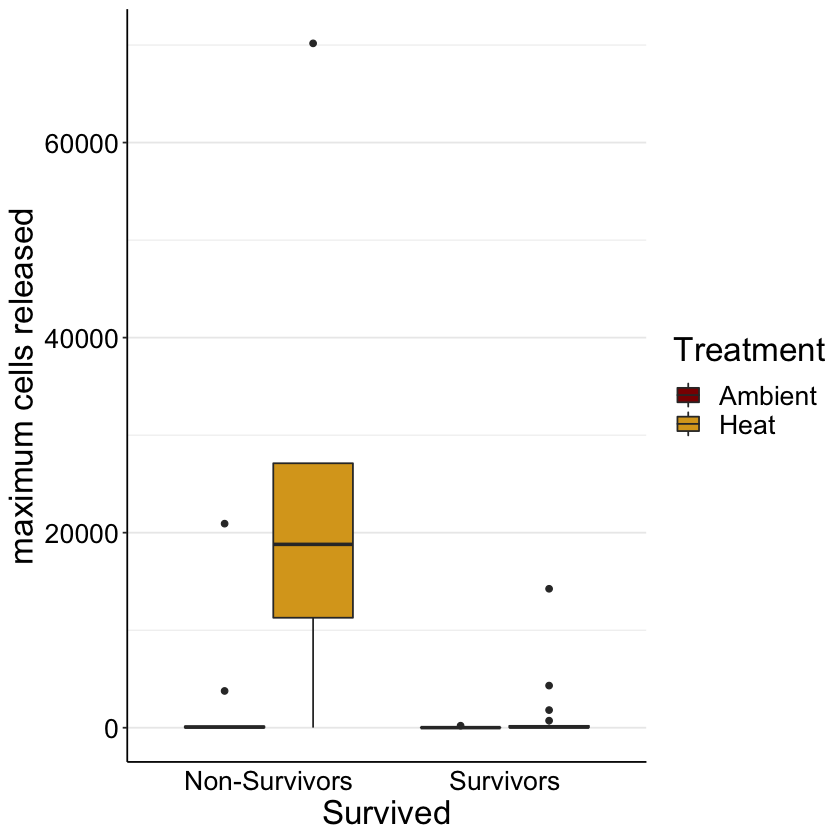

In [273]:
#plot a boxplot
ggplot(maxfull, aes(x = Survived, y = (number), fill=Treatment)) +
scale_fill_manual(values=c("darkred", "goldenrod"))+
        geom_boxplot()+
theme_bw()+
 theme(legend.position="right", panel.border = element_blank(), 
          panel.grid.major.x = element_blank(), 
          panel.grid.minor.x = element_blank(),
          axis.ticks.x=element_blank(), axis.line=element_line(color="black"), axis.text=element_text(color="black"),
          text = element_text(size=20))+
ylab("maximum cells released")